In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prices=pd.read_csv('data/sample_prices.csv')
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [3]:
returns=prices.pct_change()
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [4]:
returns=returns.dropna()

In [5]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [8]:
deviations=returns-returns.mean()
sq_deviations=deviations**2
#var=(sq_deviations.sum)/(len(deviations)-1)
volatility=np.sqrt(1/len(returns)*(sq_deviations.sum()))
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [10]:
deviations=returns-returns.mean()
sq_deviations=deviations**2
var=(sq_deviations.sum())/(len(deviations)-1)
volatility=np.sqrt(var)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [12]:
#annualized volatility 
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [17]:
returns=pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)

In [18]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [19]:
columns=['Lo 10','Hi 10']
returns=returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [20]:
returns=returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [21]:
returns.columns=['smallcap','largecap']

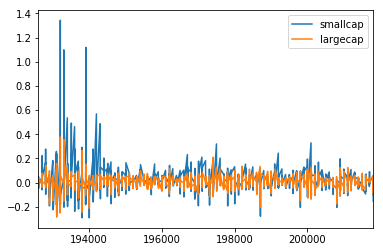

In [22]:
returns.plot.line()

In [23]:
returns.std()

smallcap    0.106288
largecap    0.053900
dtype: float64

In [27]:
annualized_vol=returns.std()*(np.sqrt(12))
annualized_vol

smallcap    0.368193
largecap    0.186716
dtype: float64

In [28]:
returns

,smallcap,largecap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [29]:
n_months=returns.shape[0]
returns_per_month=(returns+1).prod()**(1/n_months)-1
returns_per_month

smallcap    0.012986
largecap    0.007423
dtype: float64

In [30]:
annualized_vol

smallcap    0.368193
largecap    0.186716
dtype: float64

In [31]:
annualized_return=(returns_per_month+1)**12-1
annualized_return

smallcap    0.167463
largecap    0.092810
dtype: float64

In [32]:
annualized_return=(returns+1).prod()**(12/n_months)-1
annualized_return

smallcap    0.167463
largecap    0.092810
dtype: float64

In [33]:
annualized_return/annualized_vol

smallcap    0.454825
largecap    0.497063
dtype: float64

In [36]:
riskfree_rate=0.03
excess_return=annualized_return-riskfree_rate
sharpe_ratio=excess_return/annualized_vol
sharpe_ratio

smallcap    0.373346
largecap    0.336392
dtype: float64

# repeat exercize for quantiles whre smallest 20% are smallcaps and largest 20 % are largecaps